# EDA and Visualization of Bank Stocks - Finance Data Project 

AIM: Learn how to use the pandas_datareader for loading multiple financial datasets showing stocks of leading banks. Practice Exploratory data analysis and Data Visualization skills by using pandas, seaborn, matplotlib, plotly and cufflinks

DATASET: We'll focus on stocks of major international banks and see how they progressed throughout the financial crisis.

## Setup to Load the Data
Install the following:
- [pandas-datareader](https://github.com/pydata/pandas-datareader) : Pandas datareader allows you to read stock information directly from the internet. Use
**!pip install pandas-datareader**

- nb_black : Autoformatter for Jupyter Notebook. Use **!pip install nb_black**

### The Imports

In [6]:
#!pip install pandas-datareader
#!pip install nb_black
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [7]:
import pandas_datareader.data as web
import warnings

warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import datetime

%matplotlib inline

<IPython.core.display.Javascript object>

## Load the Data

We need to get data using pandas datareader. We will get stock information for the following banks:
* Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. [Remote Data Access](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) sources are helpful in gathering information. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. Follow the steps below:**
1. Use datetime to set start and end datetime objects from Jan 1st 2006 to Jan 1st 2016, accordingly
2. Figure out the ticker symbol for each bank --> google search
3. Figure out how to use datareader to grab info on the stock, example below.

Note: At the time of coding this notebook, 'yahoo' API was responsive. Other APIs can also help in gathering data such as ['iex-tops'](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html#remote-data-iex)

**Example to use web.DataReader for Bank of America stocks:**

- #Set start and end datetime objects
- BAC = data.DataReader("BAC", 'yahoo', start, end) **

#### Use datetime to set start and end datetime objects

In [14]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

<IPython.core.display.Javascript object>

#### Use datareader to grab info on the stock. Search ticker symbols for all banks to set as variables**

In [15]:
BAC = web.DataReader("BAC", "yahoo", start, end)
C = web.DataReader("C", "yahoo", start, end)
GS = web.DataReader("GS", "yahoo", start, end)
JPM = web.DataReader("JPM", "yahoo", start, end)
MS = web.DataReader("MS", "yahoo", start, end)
WFC = web.DataReader("WFC", "yahoo", start, end)

<IPython.core.display.Javascript object>

#### Check the head of the any bank's stocks dataframe

In [20]:
bank_stocks["BAC"]

Stock Info,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,47.180000,46.150002,46.919998,47.080002,16296700.0,35.054218
2006-01-04,47.240002,46.450001,47.000000,46.580002,17757900.0,34.681938
2006-01-05,46.830002,46.320000,46.580002,46.639999,14970700.0,34.726604
2006-01-06,46.910000,46.349998,46.799999,46.570000,12599800.0,34.674480
2006-01-09,46.970001,46.360001,46.720001,46.599998,15619400.0,34.696808
...,...,...,...,...,...,...
2015-12-24,17.379999,17.219999,17.320000,17.270000,29369400.0,15.859037
2015-12-28,17.230000,16.980000,17.219999,17.129999,41777500.0,15.730473
2015-12-29,17.350000,17.160000,17.250000,17.280001,45670400.0,15.868218


<IPython.core.display.Javascript object>

### Prepare the data for Exploratory Data Analysis

We will create a bank_stocks dataframe consisting of the stock information for all the banks together. Follow the steps below:

#### Create a list of the ticker symbols (as strings) in alphabetical order. Name this list: tickers

In [24]:
tickers = ["BAC", "C", "GS", "JPM", "MS", "WFC"]

<IPython.core.display.Javascript object>

#### Concatenate the bank dataframes to a single data frame called bank_stocks using pd.concat()
- Set the 'keys' argument equal to the 'tickers' list. 
- Also pay attention to what 'axis' you concatenate on.
    - axis = 0 - Default: concatinating along the index means extending index
    - axis = 1 - Used: To concatenate along the columns means extending columns

In [25]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], keys=tickers, axis=1)
bank_stocks.head()

BAC                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  35.054218   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  34.681938   
2006-01-05  46.830002  46.320000  46.580002  46.639999  14970700.0  34.726604   
2006-01-06  46.910000  46.349998  46.799999  46.570000  12599800.0  34.674480   
2006-01-09  46.970001  46.360001  46.720001  46.599998  15619400.0  34.696808   

                     C                                      ...         MS  \
                  High         Low        Open       Close  ...       Open   
Date                                                        ...              
2006-01-03  493.799988  481.100006  490.000000  492.899994  ...  57.169998   
2006-01-04  491.000000  483.500000  488.600006  483.799988  ...  58.700001   
2006-01-05  487.799988  484.000000  484.399994  486.200012  ...  58.549999   
2006-01-06  489.000000  482.000000  488.799988  486.200012  ...  58.770000   
2006-01-09  487.399994  483.000000  486.000000  483.899994  ...  58.630001   

                                                   WFC                        \
                Close     Volume  Adj Close       High        Low       Open   
Date                                                                           
2006-01-03  58.310001  5377000.0  37.429329  31.975000  31.195000  31.600000   
2006-01-04  58.349998  7977800.0  37.455013  31.820000  31.365000  31.799999   
2006-01-05  58.509998  5778000.0  37.557716  31.555000  31.309999  31.500000   
2006-01-06  58.570000  6889800.0  37.596241  31.775000  31.385000  31.580000   
2006-01-09  59.189999  4144500.0  37.994202  31.825001  31.555000  31.674999   

                                              
                Close      Volume  Adj Close  
Date                                          
2006-01-03  31.900000  11016400.0  20.904305  
2006-01-04  31.530001  10870000.0  20.661839  
2006-01-05  31.495001  10158000.0  20.638908  
2006-01-06  31.680000   8403800.0  20.760138  
2006-01-09  31.674999   5619600.0  20.756863  

[5 rows x 36 columns]

<IPython.core.display.Javascript object>

#### Set the labels for the indexes rows representing names of the columns

In [26]:
bank_stocks.columns.names = ["Bank Ticker", "Stock Info"]

<IPython.core.display.Javascript object>

#### Check the head of the bank_stocks dataframe

In [27]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   35.054218  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   34.681938  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   34.726604  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   34.674480  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   34.696808  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  37.429329  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  37.455013  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  37.557716  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  37.596241  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  37.994202  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.904305  
2006-01-04   31.799999  31.530001  10870000.0  20.661839  
2006-01-05   31.500000  31.495001  10158000.0  20.638908  
2006-01-06   31.580000  31.680000   8403800.0  20.760138  
2006-01-09   31.674999  31.674999   5619600.0  20.756863  

[5 rows x 36 columns]

<IPython.core.display.Javascript object>

# EDA

Let's explore the data a bit! 
I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and using [dataframe.xs()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) which is a very powerful function explained below:

### .xs(): 
**Syntax**
- DataFrame.xs(self, key, axis=0, level=None, drop_level: bool = True)
- Returns cross-section from the Series/DataFrame.


**Parameters:**

- key = Label/Tuple of Labels for which values are needed
    - Label contained in the index, or partially in a MultiIndex.

- axis = {0 or ‘index’, 1 or ‘columns’}, default 0
    - Axis to retrieve cross-section on.

- level = Index Level of the key in MultiIndex dataframe
    - defaults to first n levels (n=1 or len(key))
    - In case of a key partially contained in a MultiIndex, indicate which levels are used. Levels can be referred by label or position.

- drop_levelbool, default True
    - If False, returns object with same levels as self.

**Returns:**
Series or DataFrame
Cross-section from the original Series or DataFrame corresponding to the selected index levels

#### What is the max Close price for each bank's stock throughout the time period?
Method 1: Using for loop

Method 2: Using .xs()

In [123]:
for bank in tickers:
    print(bank + "\t" + str(bank_stocks[bank]["Close"].max()))

BAC	54.900001525878906
C	564.0999755859375
GS	247.9199981689453
JPM	70.08000183105469
MS	89.30000305175781
WFC	58.52000045776367


<IPython.core.display.Javascript object>

In [124]:
bank_stocks.xs(key="Close", axis=1, level="Stock Info").max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

<IPython.core.display.Javascript object>

#### Returns for each bank's stock

Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

We can use pandas pct_change() method on the 'Close' column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.

In [125]:
returns = pd.DataFrame()

<IPython.core.display.Javascript object>

In [126]:
# Using .xs()
for bank in tickers:
    returns[bank + " Return"] = bank_stocks.xs(key="Close", axis=1, level="Stock Info")[
        bank
    ].pct_change()
returns

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158
...,...,...,...,...,...,...
2015-12-24,-0.004037,0.001520,-0.002624,-0.001948,-0.003681,-0.003997
2015-12-28,-0.008107,-0.006261,-0.004658,-0.003303,-0.009544,-0.002554
2015-12-29,0.008757,0.011455,0.010516,0.010395,0.011812,0.011156


<IPython.core.display.Javascript object>

In [127]:
# Using column label 'Close'
for tick in tickers:
    returns[tick + " Return"] = bank_stocks[tick]["Close"].pct_change()
returns

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158
...,...,...,...,...,...,...
2015-12-24,-0.004037,0.001520,-0.002624,-0.001948,-0.003681,-0.003997
2015-12-28,-0.008107,-0.006261,-0.004658,-0.003303,-0.009544,-0.002554
2015-12-29,0.008757,0.011455,0.010516,0.010395,0.011812,0.011156


<IPython.core.display.Javascript object>

### idxmin() & idxmax()
#### On which dates each bank had the best and worst single day returns?
Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?

- Index when the value was min : Use idxmin()
- Index when the value was max : Use idxmax()

In [57]:
# Worst Drop (4 of them on Inauguration day)
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

<IPython.core.display.Javascript object>

In [58]:
# Best Single Day Gain
# citigroup stock split in May 2011, but also JPM day after inauguration.
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

<IPython.core.display.Javascript object>

You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame?

[Citigroup had a stock split.](https://www.google.com/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=citigroup+stock+2011+may)

### Standard Deviation

#### Standard Deviation for stocks of all banks - Classify the riskiest
Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?
- dataframe.std() : gives standard deviation
- dataframe.[specify index range like 'start' : 'end'].std() : Standard Deviation for the specified time period

In [128]:
returns.std()  # Citigroup riskiest

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

<IPython.core.display.Javascript object>

In [129]:
returns["2015-01-01":"2015-12-31"].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

<IPython.core.display.Javascript object>

# Stock Vizualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### The Imports

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf

cf.go_offline()

<IPython.core.display.Javascript object>

### Plots

#### Pairplot
**Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

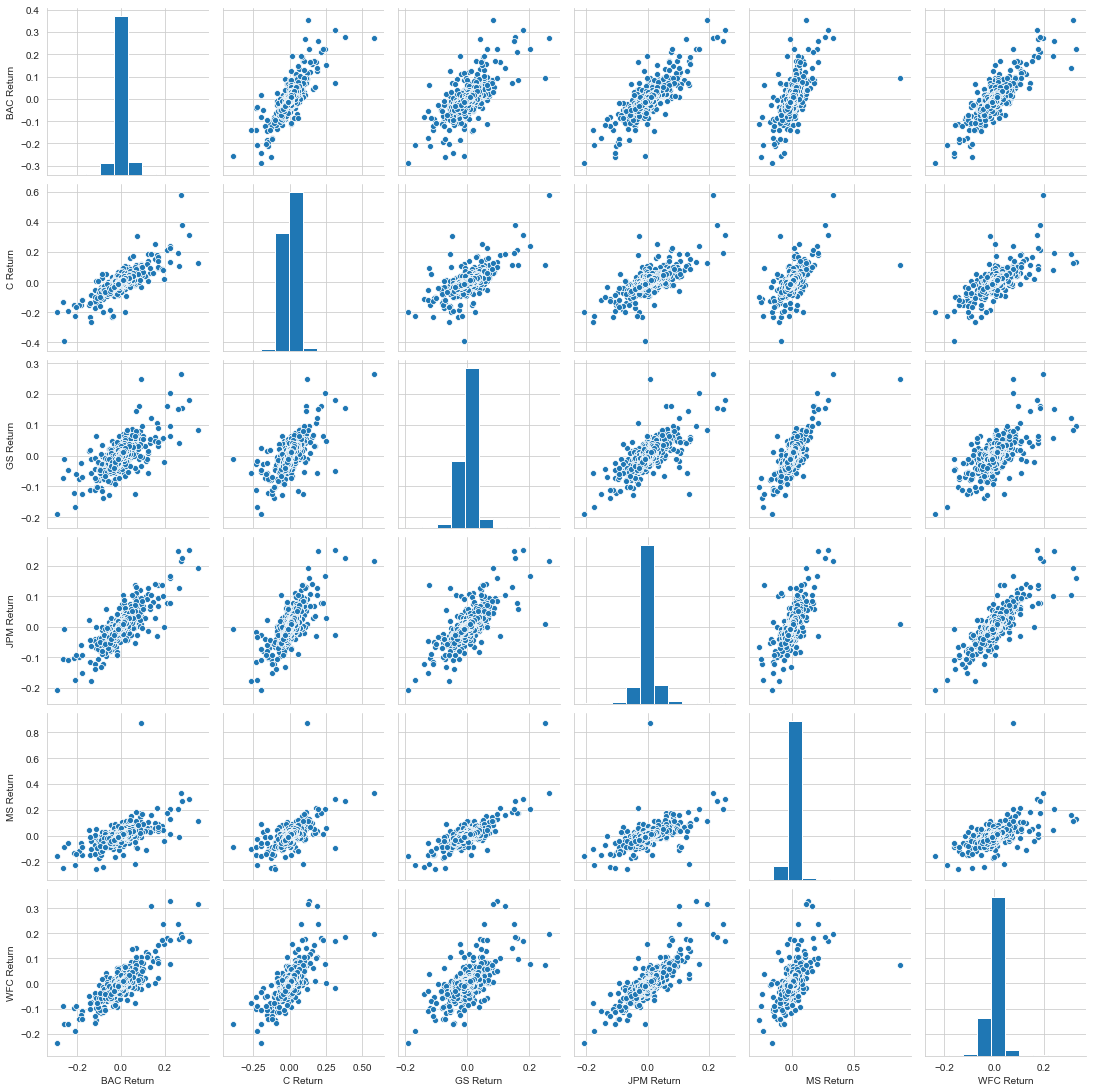

<IPython.core.display.Javascript object>

In [97]:
sns.pairplot(returns)

Background on [Citigroup's Stock Crash available here.](https://en.wikipedia.org/wiki/Citigroup#November_2008.2C_Collapse_.26_US_Government_Intervention_.28part_of_the_Global_Financial_Crisis.29) 

You'll also see the enormous crash in value if you take a look a the stock price plot (which we do later in the visualizations.)

#### Distribution plot
**Create a distplot using seaborn of the 2015 returns for Morgan Stanley**

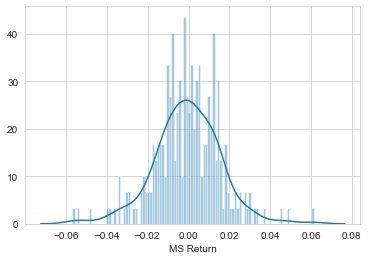

<IPython.core.display.Javascript object>

In [98]:
sns.distplot(returns["2015-01-01":"2015-12-31"]["MS Return"], bins=100)

**Create a distplot using seaborn of the 2008 returns for CitiGroup**

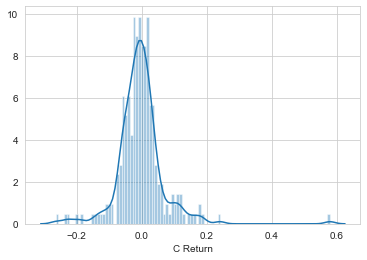

<IPython.core.display.Javascript object>

In [99]:
sns.distplot(returns["C Return"]["2008-01-01":"2008-12-31"], bins=100)

#### Line plot

**Create a line plot showing Close price for each bank for the entire index of time.** 
(Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)

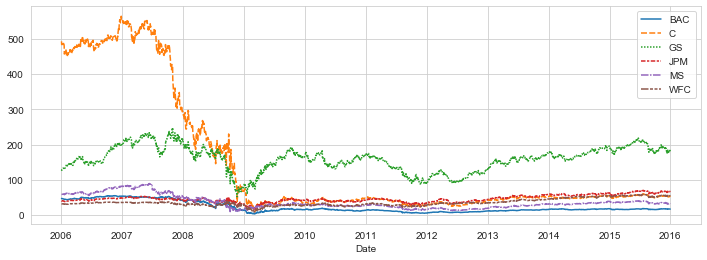

<IPython.core.display.Javascript object>

In [100]:
plt.figure(figsize=(12, 4))
sns.lineplot(data=bank_stocks.xs(key="Close", axis=1, level="Stock Info"))

#### Interactive Line plot using iplot()

In [101]:
bank_stocks.xs(key="Close", axis=1, level="Stock Info").iplot()

<IPython.core.display.Javascript object>

### Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

#### .rolling()

**Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**



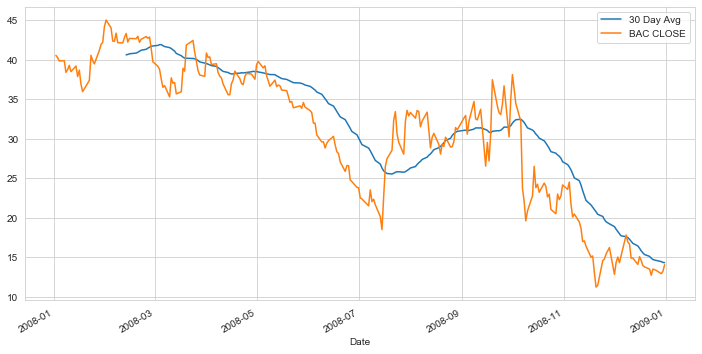

<IPython.core.display.Javascript object>

In [130]:
# Using matplotlib
plt.figure(figsize=(12, 6))
BAC["Close"]["2008-01-01":"2009-01-01"].rolling(window=30).mean().plot(
    label="30 Day Avg"
)
BAC["Close"]["2008-01-01":"2009-01-01"].plot(label="BAC CLOSE")
plt.legend()

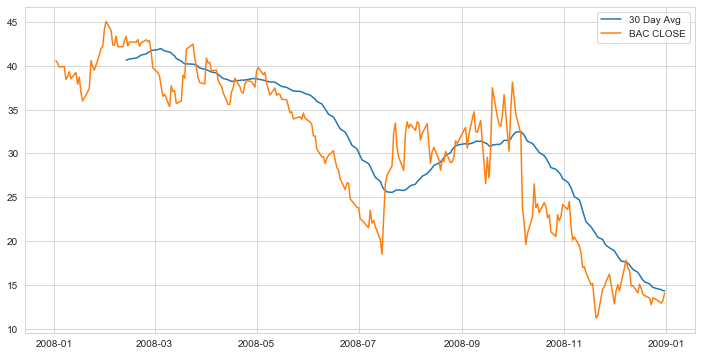

<IPython.core.display.Javascript object>

In [137]:
# 2 line plots Using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=bank_stocks["BAC"]["Close"]["2008-01-01":"2008-12-31"]
    .rolling(window=30)
    .mean(),
    label="30 Day Avg",
)
sns.lineplot(
    data=bank_stocks["BAC"]["Close"]["2008-01-01":"2008-12-31"], label="BAC CLOSE"
)

#### Seaborn Heatmap for correlation
**Create a heatmap of the correlation between the stocks Close Price.**

In [104]:
Close_Price = bank_stocks.xs(key="Close", axis=1, level="Stock Info")
corr = Close_Price.corr()

<IPython.core.display.Javascript object>

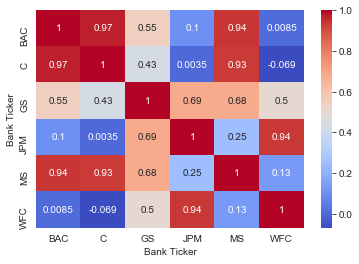

<IPython.core.display.Javascript object>

In [105]:
sns.heatmap(corr, cmap="coolwarm", annot=True)

#### Clustermap the correlations

**Use seaborn's clustermap to cluster the correlations together:**

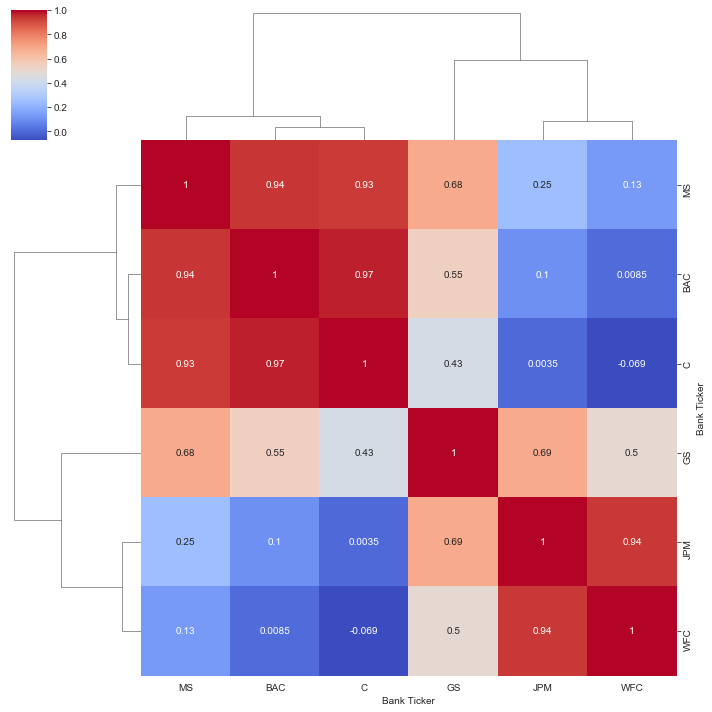

<IPython.core.display.Javascript object>

In [106]:
sns.clustermap(corr, cmap="coolwarm", annot=True)

### Cufflinks for Technical Analysis plots

Let's use the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to look up if any functionality is broken in the future.

#### CandleStick plots
**Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

[Candlestick Charts in Python](https://plotly.com/python/candlestick-charts/)

In [107]:
BAC.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,47.180000,46.150002,46.919998,47.080002,16296700.0,35.054218
2006-01-04,47.240002,46.450001,47.000000,46.580002,17757900.0,34.681938
2006-01-05,46.830002,46.320000,46.580002,46.639999,14970700.0,34.726604
2006-01-06,46.910000,46.349998,46.799999,46.570000,12599800.0,34.674480
2006-01-09,46.970001,46.360001,46.720001,46.599998,15619400.0,34.696808


<IPython.core.display.Javascript object>

##### Using iplot(kind = 'candle')

In [108]:
BAC[["Open", "High", "Low", "Close"]]["2015-01-01":"2016-01-01"].iplot(kind="candle")

<IPython.core.display.Javascript object>

##### Using plotly graph_objects

In [109]:
import plotly.graph_objects as go

<IPython.core.display.Javascript object>

In [111]:
fig = go.Figure(
    data=[
        go.Candlestick(
            x=BAC.reset_index()["Date"],
            open=BAC["Open"],
            high=BAC["High"],
            low=BAC["Low"],
            close=BAC["Close"],
            increasing_line_color="cyan",
            decreasing_line_color="gray",
        )
    ]
)
# Without range slider
# fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

<IPython.core.display.Javascript object>

#### Dash Application by plotly

In [116]:
#!pip install dash
import dash
import dash_core_components as dcc
import dash_html_components as html

<IPython.core.display.Javascript object>

In [120]:
app = dash.Dash()
app.layout = html.Div([dcc.Graph(figure=fig)])

app.run_server(debug=True, use_reloader=False)

# Interrupt the kernel after using and closing the Dash application

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 in production, use a production WSGI server like gunicorn instead.

 in production, use a production WSGI server like gunicorn instead.

 in production, use a production WSGI server like gunicorn instead.

 in production, use a production WSGI server like gunicorn instead.

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


<IPython.core.display.Javascript object>

####  Simple Moving Averages plot by .ta_plot(study='sma')

Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [121]:
SMA_MS = MS["Close"]["2015-01-01":"2016-01-01"].ta_plot(study="sma")
# MS['Close']['2015-01:-01':'2016-01-01'].rolling(window = 30).mean()
SMA_MS  # .ta_plot(study = 'sma')

<IPython.core.display.Javascript object>

#### Bollinger Band Plot using .ta_plot(study='boll')

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [122]:
BAC["Close"]["2015-01-01":"2016-01-01"].ta_plot(
    study="boll", study_colors=["red", "green", "blue"]
)

<IPython.core.display.Javascript object>

# Great Job!

Hope you enjoyed practicing the pandas and visualization Operations with a Financial Stock based Dataset!